In [ ]:
import pandas as pd
import os
import numpy as np

control=[]
adhd=[]
for i in range(19):
    b=[]
    for j in os.listdir(f'./drive/MyDrive/ch_corr/ADHD/{i}'):
        b.append(pd.read_csv(f'./drive/MyDrive/ch_corr/ADHD/{i}/'+j,index_col='Unnamed: 0').to_numpy())
    adhd.append(b)
    
for i in range(19):
    b=[]    
    for j in os.listdir(f'./drive/MyDrive/ch_corr/Control/{i}'):
        b.append(pd.read_csv(f'./drive/MyDrive/ch_corr/Control/{i}/'+j,index_col='Unnamed: 0').to_numpy())
    control.append(b)

control= np.array(control).transpose(1,0,2,3)
adhd=np.array(adhd).transpose(1,0,2,3)

x=np.append(adhd,control,axis=0)
y=np.array([1]*61+[0]*60)

In [ ]:
def crop(dimension, start, end):
    # Crops (or slices) a Tensor on a given dimension from start to end
    # example : to crop tensor x[:, :, 5:10]
    # call slice(2, 5, 10) as you want to crop on the second dimension
    def func(x):
        if dimension == 0:
            return x[start: end]
        if dimension == 1:
            return x[:, start: end]
        if dimension == 2:
            return x[:, :, start: end]
        if dimension == 3:
            return x[:, :, :, start: end]
        if dimension == 4:
            return x[:, :, :, :, start: end]
    return Lambda(func)
import math
def slice_model(model_input,unit,row_num,col_num,term):
  remain=math.ceil(unit/2)
  return [crop(3,col_num-(j+unit),col_num-j)(crop(2,row_num-(i+unit),row_num-i)(model_input)) for i in range(0,row_num-unit+1,term) for j in range(0,col_num-unit+1,term)]

In [ ]:
import sys
import sys
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, GlobalMaxPooling3D,Lambda,concatenate,Conv3D, MaxPooling3D,GlobalAveragePooling3D
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import os




def mk_model(filepath=None):
    
    FILTER_SIZE=3
    NUM_FILTERS=8
    INPUT_SIZE=19
    MAXPOOL_SIZE=2

    densors=[]
    model_input=Input(shape=(19,INPUT_SIZE,INPUT_SIZE,1))
    print(model_input.shape)
    for idx in slice_model(model_input,5,19,19,2):
            model_output=Conv3D(NUM_FILTERS, (FILTER_SIZE,FILTER_SIZE,FILTER_SIZE),activation='relu')(idx)
            model_output=Dropout(0.5)(model_output)                        
            model_output=GlobalAveragePooling3D()(model_output)
            densors.append(model_output)

    model_output=concatenate(densors)
    model_output=Dense(units=512,activation='relu')(model_output)
    model_output=Dense(units=512,activation='relu')(model_output)
    model_output=Dense(units=512,activation='relu',kernel_regularizer=l1(0.01))(model_output)


    model_output=Dense(units=1,activation='sigmoid')(model_output)
    model = Model(inputs = model_input, outputs = model_output)
    model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
    
    return model




(None, 19, 19, 19, 1)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 19, 19, 19,  0                                            
__________________________________________________________________________________________________
lambda_25 (Lambda)              (None, 19, 5, 19, 1) 0           input_2[0][0]                    
__________________________________________________________________________________________________
lambda_27 (Lambda)              (None, 19, 5, 19, 1) 0           input_2[0][0]                    
__________________________________________________________________________________________________
lambda_29 (Lambda)              (None, 19, 5, 19, 1) 0           input_2[0][0]                    
______________________________________________________________________

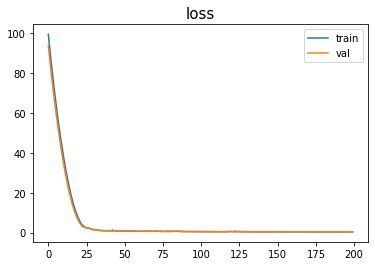

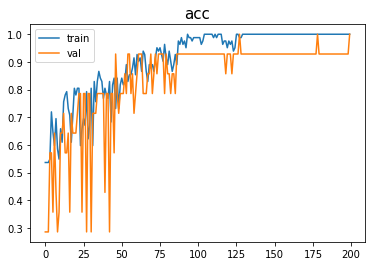

1/1 [==============================] - 0s 81ms/step - loss: 0.4333 - accuracy: 1.0000
(None, 19, 19, 19, 1)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 19, 19, 19,  0                                            
__________________________________________________________________________________________________
lambda_153 (Lambda)             (None, 19, 5, 19, 1) 0           input_3[0][0]                    
__________________________________________________________________________________________________
lambda_155 (Lambda)             (None, 19, 5, 19, 1) 0           input_3[0][0]                    
__________________________________________________________________________________________________
lambda_157 (Lambda)             (None, 19, 5, 19, 1) 0           input_3[0][0]     

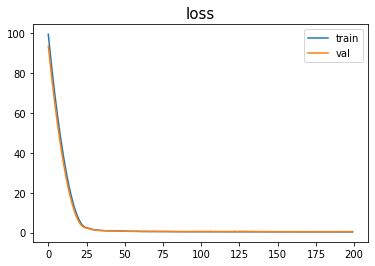

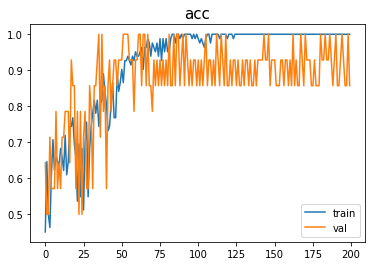

1/1 [==============================] - 0s 82ms/step - loss: 0.4773 - accuracy: 1.0000
(None, 19, 19, 19, 1)
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 19, 19, 19,  0                                            
__________________________________________________________________________________________________
lambda_281 (Lambda)             (None, 19, 5, 19, 1) 0           input_4[0][0]                    
__________________________________________________________________________________________________
lambda_283 (Lambda)             (None, 19, 5, 19, 1) 0           input_4[0][0]                    
__________________________________________________________________________________________________
lambda_285 (Lambda)             (None, 19, 5, 19, 1) 0           input_4[0][0]     

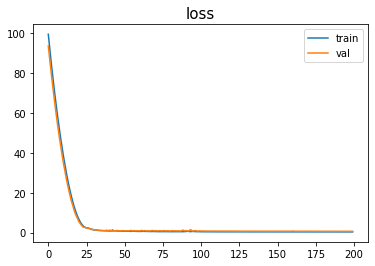

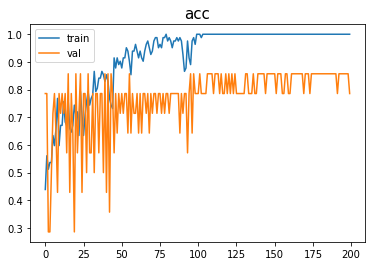

1/1 [==============================] - 0s 75ms/step - loss: 0.6729 - accuracy: 0.8571
(None, 19, 19, 19, 1)
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 19, 19, 19,  0                                            
__________________________________________________________________________________________________
lambda_409 (Lambda)             (None, 19, 5, 19, 1) 0           input_5[0][0]                    
__________________________________________________________________________________________________
lambda_411 (Lambda)             (None, 19, 5, 19, 1) 0           input_5[0][0]                    
__________________________________________________________________________________________________
lambda_413 (Lambda)             (None, 19, 5, 19, 1) 0           input_5[0][0]     

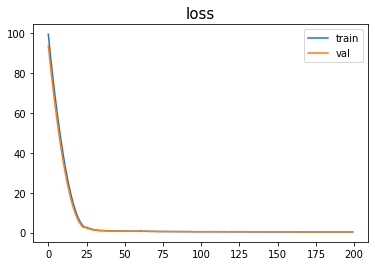

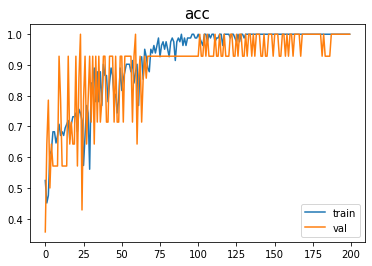

1/1 [==============================] - 0s 84ms/step - loss: 0.3794 - accuracy: 1.0000
(None, 19, 19, 19, 1)
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 19, 19, 19,  0                                            
__________________________________________________________________________________________________
lambda_537 (Lambda)             (None, 19, 5, 19, 1) 0           input_6[0][0]                    
__________________________________________________________________________________________________
lambda_539 (Lambda)             (None, 19, 5, 19, 1) 0           input_6[0][0]                    
__________________________________________________________________________________________________
lambda_541 (Lambda)             (None, 19, 5, 19, 1) 0           input_6[0][0]     

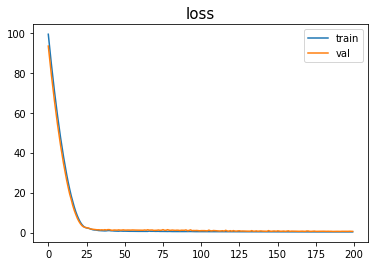

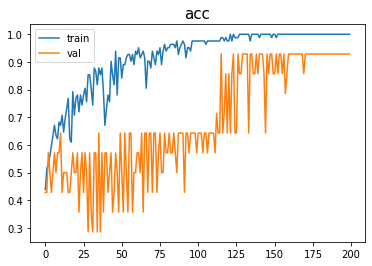

1/1 [==============================] - 0s 79ms/step - loss: 0.6081 - accuracy: 0.9286
(None, 19, 19, 19, 1)
Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 19, 19, 19,  0                                            
__________________________________________________________________________________________________
lambda_665 (Lambda)             (None, 19, 5, 19, 1) 0           input_7[0][0]                    
__________________________________________________________________________________________________
lambda_667 (Lambda)             (None, 19, 5, 19, 1) 0           input_7[0][0]                    
__________________________________________________________________________________________________
lambda_669 (Lambda)             (None, 19, 5, 19, 1) 0           input_7[0][0]     

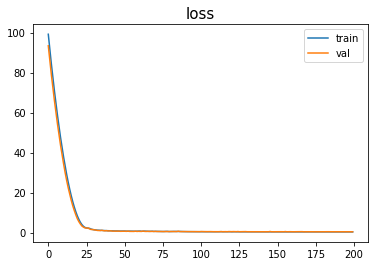

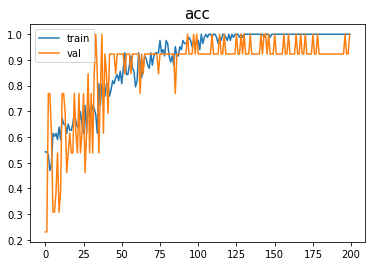

1/1 [==============================] - 0s 77ms/step - loss: 0.4160 - accuracy: 1.0000
(None, 19, 19, 19, 1)
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 19, 19, 19,  0                                            
__________________________________________________________________________________________________
lambda_793 (Lambda)             (None, 19, 5, 19, 1) 0           input_8[0][0]                    
__________________________________________________________________________________________________
lambda_795 (Lambda)             (None, 19, 5, 19, 1) 0           input_8[0][0]                    
__________________________________________________________________________________________________
lambda_797 (Lambda)             (None, 19, 5, 19, 1) 0           input_8[0][0]     

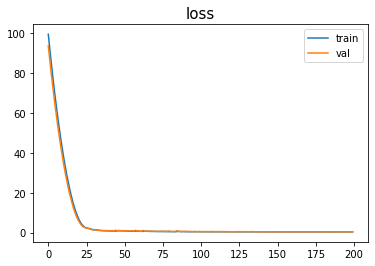

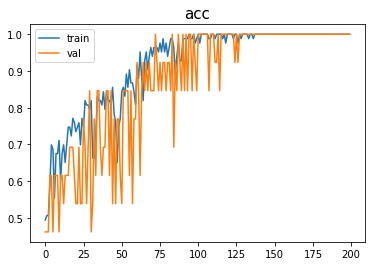

1/1 [==============================] - 0s 69ms/step - loss: 0.3894 - accuracy: 1.0000


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam



x_tra,x_test,y_tra,y_test=train_test_split(x,y,train_size=0.8,stratify=y,random_state=128)

kf=KFold(7,True )
train_score=[]
test_score=[]
val_score=[]
test_list=[]

idx=0

val_list=[]

for train_index, test_index in kf.split(x_tra):
    callback_list = [
    EarlyStopping( #성능 향상이 멈추면 훈련을 중지
    monitor='val_loss',  #모델 검증 정확도를 모니터링
    patience=50        #1 에포크 보다 더 길게(즉, 2에포크 동안 정확도가 향상되지 않으면 훈련 중지
),
    ModelCheckpoint( #에포크마다 현재 가중치를 저장
    filepath=f'./mod{idx}.h5', #모델 파일 경로
    monitor='val_loss',  # val_loss 가 좋아지지 않으면 모델 파일을 덮어쓰지 않음.
    save_best_only=True,
    mode='auto',
    verbose=1
)
]
    x_train,x_val=x_tra[train_index],x_tra[test_index]
    y_train,y_val=y_tra[train_index],y_tra[test_index]
    
    #with strategy.scope():
    model=mk_model()
    print(model.summary())
    model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
    hist=model.fit(x_train, y_train, epochs=200, validation_data=(x_val, y_val),batch_size=36,callbacks=callback_list)
    
    
    plt.plot(hist.history['loss'],label='train'+str(idx))
    plt.plot(hist.history['val_loss'],label='train'+str(idx))
    plt.title('loss',fontsize=15)
    plt.legend(['train','val'])
    plt.show()
    plt.plot(hist.history['accuracy'],label='train'+str(idx))
    plt.plot(hist.history['val_accuracy'],label='train'+str(idx))
    plt.legend(['train','val'])
    plt.title('acc',fontsize=15)
    plt.show()
    model=load_model(f'./mod{idx}.h5')
    
    train_score.append(model.evaluate(x_train,y_train))
    test_score.append(model.evaluate(x_test,y_test))
    val_score.append(model.evaluate(x_val,y_val))
    idx+=1



In [ ]:
train_score

[[0.34151899814605713, 1.0],
 [0.3556908369064331, 1.0],
 [0.36260902881622314, 1.0],
 [0.3238179683685303, 1.0],
 [0.4550715982913971, 1.0],
 [0.32176896929740906, 1.0],
 [0.34186291694641113, 1.0]]

In [ ]:
test_score

[[0.6650466918945312, 0.9200000166893005],
 [0.6667777299880981, 0.8399999737739563],
 [0.6932337880134583, 0.800000011920929],
 [0.6768825054168701, 0.800000011920929],
 [0.9106686115264893, 0.7599999904632568],
 [0.8469778299331665, 0.8399999737739563],
 [0.6377021670341492, 0.8799999952316284]]

In [ ]:
val_score

[[0.5196131467819214, 1.0],
 [0.4384850859642029, 1.0],
 [0.6274903416633606, 0.7857142686843872],
 [0.391350120306015, 1.0],
 [0.6051260828971863, 1.0],
 [0.5397868752479553, 0.8461538553237915],
 [0.44713324308395386, 0.9230769276618958]]

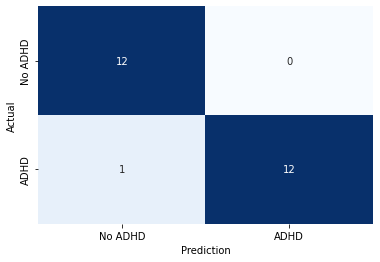

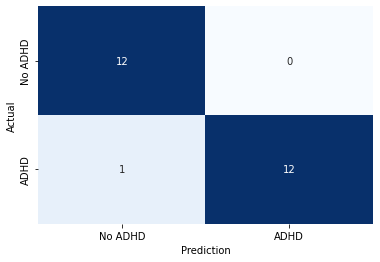

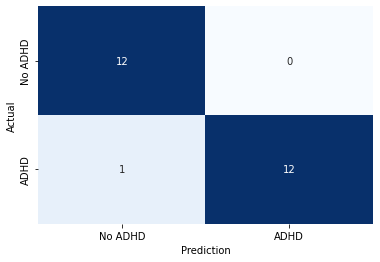

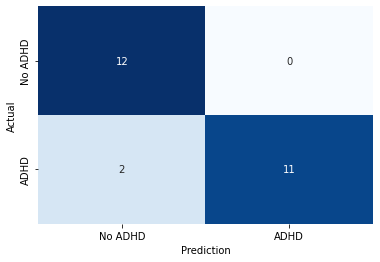

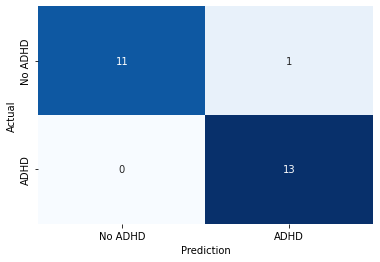

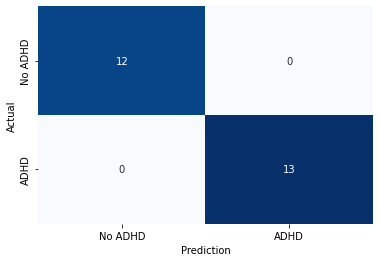

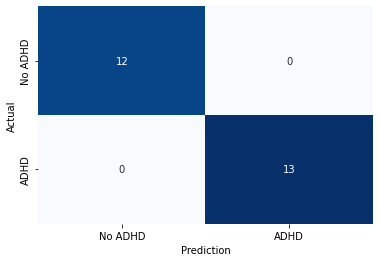

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.models import load_model
import matplotlib.pyplot as plt

for i in range(7):
  y_test_pred=load_model(f'./mod{i}.h5')
  y_test_pred=y_test_pred.predict(x_test)

  y_pred=y_test_pred.flatten()

  y_test_pred=np.where(y_pred<0.5, 0,1)

  c_matrix=confusion_matrix(y_test,y_test_pred)
  ax=sns.heatmap(c_matrix,annot=True, xticklabels=['No ADHD','ADHD'],yticklabels=['No ADHD','ADHD'],cbar=False,cmap='Blues')
  ax.set_xlabel('Prediction')
  ax.set_ylabel('Actual')
  plt.show()